In [1]:
from operator import add
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
#from gatspy.periodic import LombScargleFast
from gatspy import periodic
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from sqlite3 import *
import random
from random import shuffle
from random import randint

In [5]:
conn = connect('minion_1016_sqlite.db')

In [73]:
def findObservations(fields): #fields are array in the format [(630,), (631,)] etc
    global obs, allobs, uobs, gobs, robs, iobs, zobs, yobs
    x2 = fields # field containing gx 339-4
    L = [0]*len(x2)
    z = 0
    m=30
    ms ='|'
    c = conn.cursor()
    #t = [('357',),('356',)]
    labels=['$\it{u}$','$\it{g}$','$\it{r}$','$\it{i}$','$\it{z}$','$\it{y}$']
    yval = [5,4,3,2,1,0]
    colours = ['b','g','r','orange','brown','k']
    for z in range(0,len(x2)):
        i = x2[z]    
        #c.execute('SELECT expMJD, Field_fieldID, filter FROM ObsHistory WHERE Field_fieldID = ?',i)
        #k = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE Field_fieldID = ?', i)
        allobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "u" AND Field_fieldID = ?', i)
        uobs= c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "g" AND Field_fieldID = ?', i)
        gobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "r" AND Field_fieldID = ?', i)
        robs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "i" AND Field_fieldID = ?', i)
        iobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "z" AND Field_fieldID = ?', i)
        zobs = c.fetchall()
        c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "y" AND Field_fieldID = ?', i)
        yobs = c.fetchall()
        
        if len(allobs)==180:
            plt.plot(uobs,[5]*len(uobs),ms,color=colours[0],markersize=m)
            plt.plot(gobs,[4]*len(uobs),ms,color=colours[1],markersize=m)
            plt.plot(robs,[3]*len(uobs),ms,color=colours[2],markersize=m)
            plt.plot(iobs,[2]*len(uobs),ms,color=colours[3],markersize=m)
            plt.plot(zobs,[1]*len(uobs),ms,color=colours[4],markersize=m)
            plt.plot(yobs,[0]*len(uobs),ms,color=colours[5],markersize=m)
            plt.yticks(yval,labels)
            font = {'family' : 'serif',
                    'weight' : 'normal',
                'size'   : 14}
            plt.rc('font', **font)
            plt.rc('axes',linewidth=2)
            plt.ylim([-0.5,5.5])
            plt.title('Minion_1016 Observations')
            plt.xlabel('Date(days)')
            plt.ylabel('Filter')
            plt.savefig('MinionClumpObs.png',dpi=100,bbox_inches='tight')
            plt.show()
    obs = [allobs, uobs, gobs, robs, iobs, zobs, yobs]
    for x in range(0, len(obs)):
        for y in range(0, len(obs[x])):
            obs[x][y] = np.mean(obs[x][y])
    

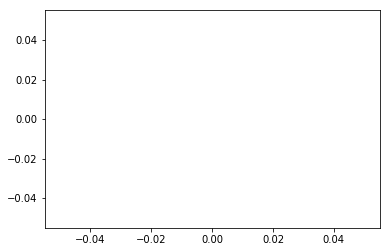

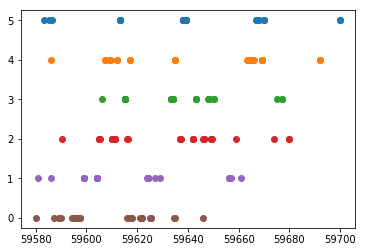

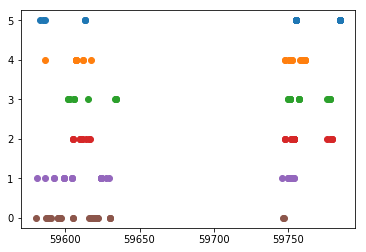

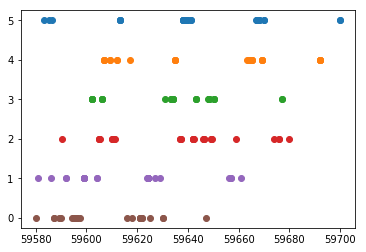

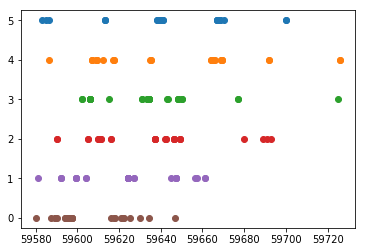

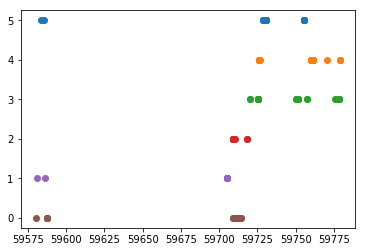

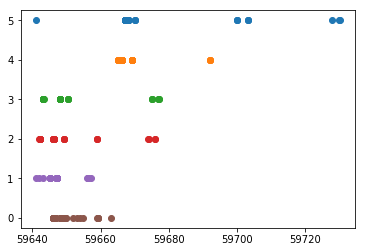

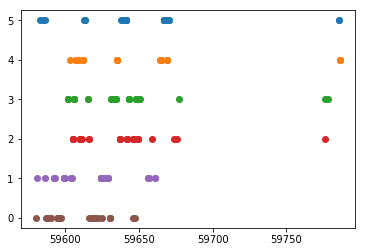

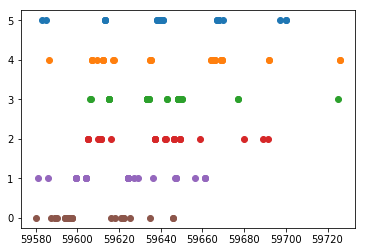

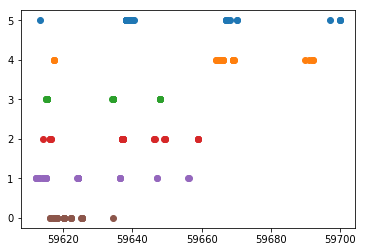

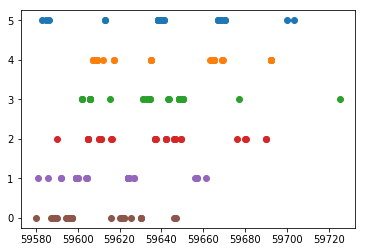

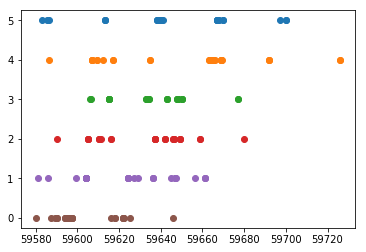

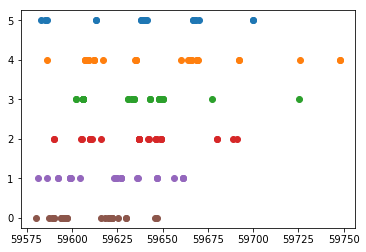

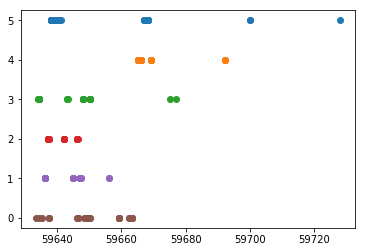

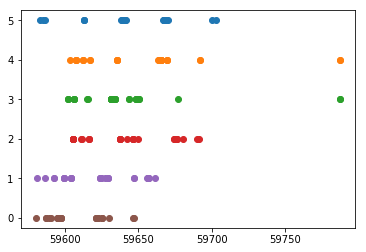

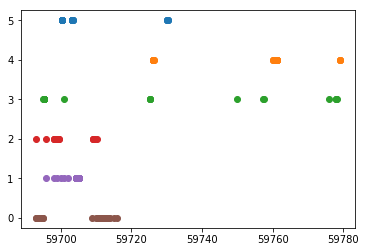

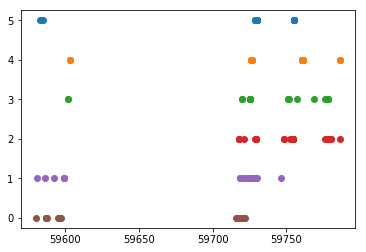

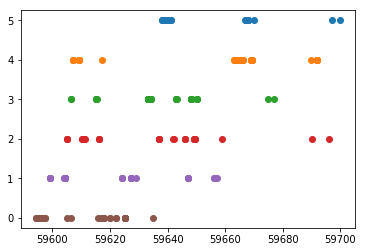

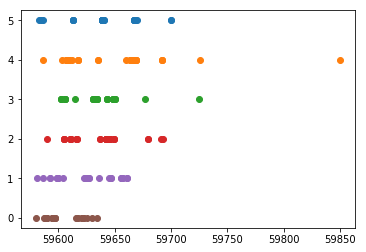

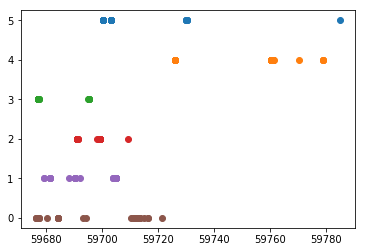

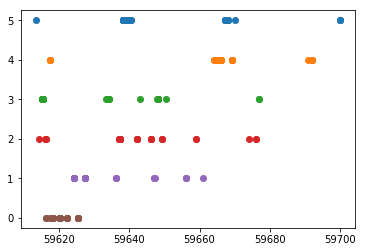

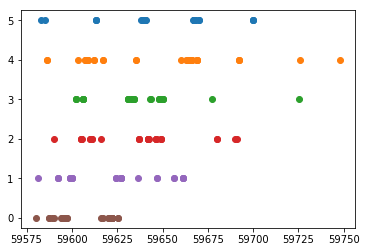

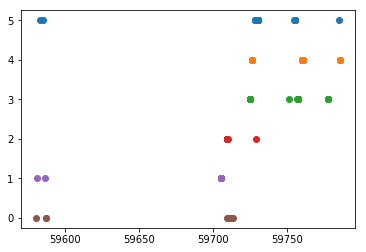

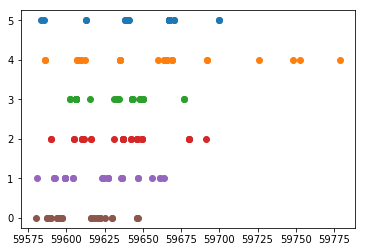

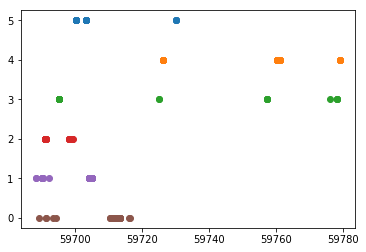

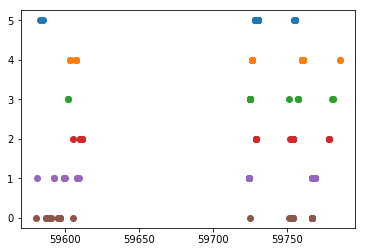

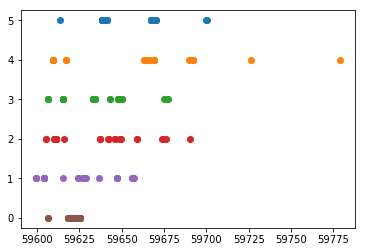

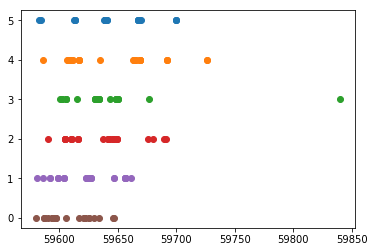

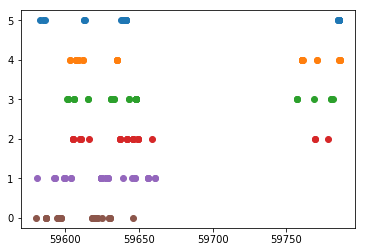

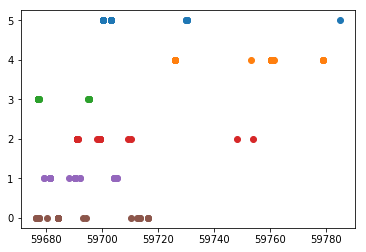

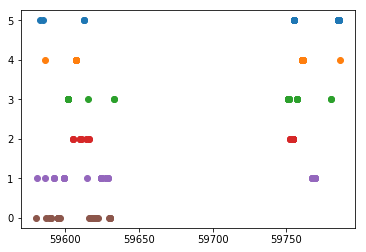

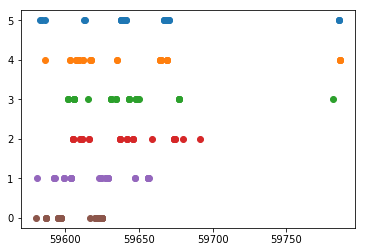

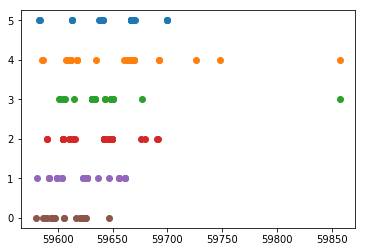

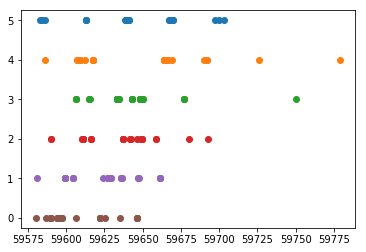

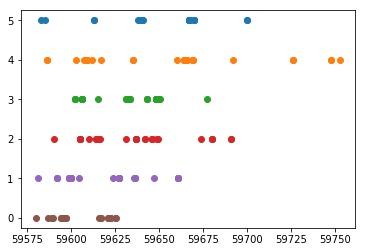

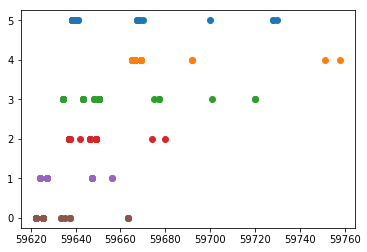

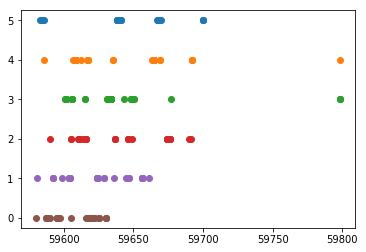

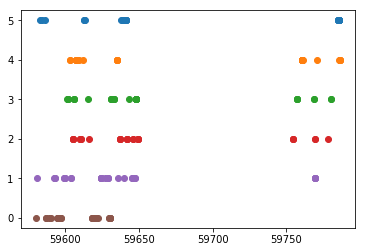

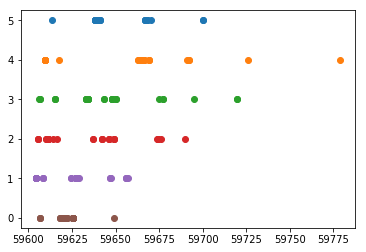

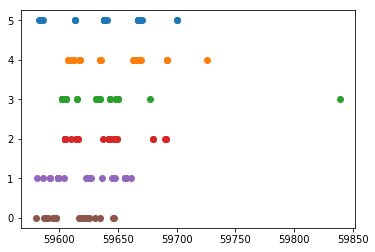

KeyboardInterrupt: 

In [28]:
for x in range(100000):
    findObservations([(x,)])

In [74]:
findObservations([(630,)])